In [14]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
f1=pd.read_csv(r'D:\imdb_labelled.txt',delimiter='\t',header=None)

In [16]:
f1.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [17]:
f2=pd.read_csv(r'D:\amazon_cells_labelled.txt',delimiter='\t',header=None)

In [18]:
f2.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [19]:
f3=pd.read_csv(r'D:\yelp_labelled.txt',delimiter='\t',header=None)

In [20]:
f3.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [21]:
f=pd.concat([f1,f2,f3],0, join= 'inner')
f

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [22]:
f.reset_index(drop=True,inplace=True)

In [23]:
f[0][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [24]:
pd.options.display.max_columns = None
import string

In [25]:
def remove_punc(text):
    punc = string.punctuation
    punc=list(punc)
    word_tokens=word_tokenize(text)
    for i in word_tokens:
        if i in punc:
            word_tokens.remove(i)
    return ' '.join(word_tokens)
f[0]=f[0].apply(lambda x:remove_punc(x))

In [26]:
f[0][0]

'A very very very slow-moving aimless movie about a distressed drifting young man'

In [27]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(text): 
    stop_words = stopwords.words("english")
    word_tokens = word_tokenize(text) 
    filtered_text = ' '.join([word for word in word_tokens if word not in stop_words])
    return filtered_text 
f[0]=f[0].apply(lambda x:remove_stopwords(x.lower()))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
f[0][2]

'attempting artiness black white clever camera angles movie disappointed became even ridiculous acting poor plot lines almost non-existent'

In [29]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
def word_lemma(l):
    wnl = WordNetLemmatizer()
    word_tokens = word_tokenize(l) 
    stems = [wnl.lemmatize(word) for word in word_tokens] 

    return ' '.join(stems)
f[0]=f[0].apply(lambda x: word_lemma(x))
# word_lemma(word_tokenize(f[0][0]))

In [31]:
wnl.lemmatize('accordingly','v')

'accordingly'

In [32]:
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()
def word_stem(l):
    lancaster = LancasterStemmer()
    
    for i in l:
        lancaster.stem(i)
    return ' '.join(l)
# f[0].apply(lambda x: word_lemma(word_tokenize(x)))
word_stem(word_tokenize(f[0][0]))
    

'slow-moving aimless movie distressed drifting young man'

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
data = tfidf_model.fit_transform(f[0])

In [35]:
tfidf_model.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '80',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accent',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolade',
 'accommodation',
 'accomodate',
 'accompanied',
 'according',
 'accordingly',
 'accountant',
 'accurate',
 'accurat

In [36]:
tfidf_model.vocabulary_

{'slow': 3749,
 'moving': 2675,
 'aimless': 152,
 'movie': 2674,
 'distressed': 1213,
 'drifting': 1270,
 'young': 4657,
 'man': 2504,
 'sure': 4011,
 'lost': 2447,
 'flat': 1616,
 'character': 695,
 'audience': 307,
 'nearly': 2722,
 'half': 1883,
 'walked': 4498,
 'attempting': 302,
 'artiness': 270,
 'black': 450,
 'white': 4563,
 'clever': 772,
 'camera': 611,
 'angle': 205,
 'disappointed': 1179,
 'became': 393,
 'even': 1436,
 'ridiculous': 3427,
 'acting': 110,
 'poor': 3084,
 'plot': 3062,
 'line': 2401,
 'almost': 173,
 'non': 2767,
 'existent': 1478,
 'little': 2416,
 'music': 2694,
 'anything': 227,
 'speak': 3828,
 'best': 428,
 'scene': 3539,
 'gerardo': 1775,
 'trying': 4274,
 'find': 1593,
 'song': 3799,
 'keep': 2271,
 'running': 3480,
 'head': 1929,
 'rest': 3395,
 'lack': 2309,
 'art': 267,
 'charm': 706,
 'meaning': 2553,
 'emptiness': 1377,
 'work': 4615,
 'guess': 1870,
 'empty': 1378,
 'wasted': 4518,
 'two': 4289,
 'hour': 2024,
 'saw': 3530,
 'today': 4181,
 'th

In [37]:
print(data.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
words_idf = dict(zip(tfidf_model.get_feature_names(), tfidf_model.idf_))

In [39]:
sorted(words_idf.items(), key = lambda x : x[1])

[('good', 3.567134354689179),
 ('great', 3.6614971161374643),
 ('phone', 3.8009986757484904),
 ('movie', 3.9217802144011307),
 ('film', 3.9773500655559415),
 ('time', 4.0669622242456285),
 ('food', 4.106808132792828),
 ('one', 4.114971443431989),
 ('place', 4.1315007453832),
 ('like', 4.174060359801995),
 ('service', 4.227644605936102),
 ('work', 4.265032138007722),
 ('really', 4.3756977058952415),
 ('would', 4.419182817834981),
 ('well', 4.4530843695106626),
 ('bad', 4.47634123167493),
 ('also', 4.614927394961076),
 ('back', 4.628533047016855),
 ('even', 4.628533047016855),
 ('best', 4.64232636914919),
 ('could', 4.670497246115887),
 ('ever', 4.670497246115887),
 ('go', 4.71429986877428),
 ('quality', 4.71429986877428),
 ('get', 4.744605218269609),
 ('love', 4.775857761773713),
 ('ve', 4.808118623991934),
 ('make', 4.858549477618826),
 ('product', 4.858549477618826),
 ('headset', 4.930008441600972),
 ('made', 4.930008441600972),
 ('nice', 4.930008441600972),
 ('better', 4.987166855440

In [40]:
tfidf_df = pd.DataFrame(data.todense())

tfidf_df.columns = sorted(tfidf_model.vocabulary_)

tfidf_df.head()

00   10  100   11   12   13   15  15g  15pm   17   18  18th  1928  1947  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   0.0   

   1948  1949  1971  1973  1979  1980  1986  1995  1998   20  2000  2005  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   

   2006  2007  20th  2160   23   24   25  2mp   30  325   35  350  375   3o  \
0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    40  40min   42   44   45  4ths   50  5020  510  5320   54  5lb  680   70  \
0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
1  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
2  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
3  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
4  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0   

   70000  700w   80  8125   85  8525  8530  8pm   90   95   99  aailiyah  \
0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0   
1    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0   
2    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0   
3    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0   
4    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0   

   abandoned  abhor  ability  able  abound  abroad  absolute  absolutel  \
0        0.0    0.0      0.0   0.0     0.0     0.0       0.0        0.0   
1        0.0    0.0      0.0   0.0     0.0     0.0       0.0        0.0   
2        0.0    0.0      0.0   0.0     0.0     0.0       0.0        0.0   
3        0.0    0.0      0.0   0.0     0.0     0.0       0.0        0.0   
4        0.0    0.0      0.0   0.0     0.0     0.0       0.0        0.0   

   absolutely  absolutley  abstruse  abysmal   ac  academy  accent  accept  \
0         0.0         0.0       0.0      0.0  0.0      0.0     0.0     0.0   
1         0.0         0.0       0.0      0.0  0.0      0.0     0.0     0.0   
2         0.0         0.0       0.0      0.0  0.0      0.0     0.0     0.0   
3         0.0         0.0       0.0      0.0  0.0      0.0     0.0     0.0   
4         0.0         0.0       0.0      0.0  0.0      0.0     0.0     0.0   

   acceptable  access  accessable  accessible  accessing  accessory  \
0         0.0     0.0         0.0         0.0        0.0        0.0   
1         0.0     0.0         0.0         0.0        0.0        0.0   
2         0.0     0.0         0.0         0.0        0.0        0.0   
3         0.0     0.0         0.0         0.0        0.0        0.0   
4         0.0     0.0         0.0         0.0        0.0        0.0   

   accessoryone  accident  accidentally  acclaimed  accolade  accommodation  \
0           0.0       0.0           0.0        0.0       0.0            0.0   
1           0.0       0.0           0.0        0.0       0.0            0.0   
2           0.0       0.0           0.0        0.0       0.0            0.0

In [29]:
pd.concat([tfidf_df,f[1]],1)

00   10  100   11   12   13   15  15g  15pm   17   18  18th  1928  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   ...   ...   
2743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
2744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
2745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
2746  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   
2747  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0   

      1947  1948  1949  1971  1973  1979  1980  1986  1995  1998   20  2000  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2743   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
2744   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
2745   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
2746   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   
2747   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   

      2005  2006  2007  20th  2160   23   24   25  2mp   30  325   35  350  \
0      0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
2743   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2744   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2745   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2746   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2747   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      375   3o   40  40min   42   44   45  4ths   50  5020  510  5320   54  \
0     0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
1     0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
2     0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
3     0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
4     0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
...   ...  ...  ...    ...  ...  ...  ...   ...  ...   ...  ...   ...  ...   
2743  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
2744  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
2745  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
2746  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   
2747  0.0  0.0  0.0    0.0  0.0  0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   

      5lb  680   70  70000  700w   80  8125   85  8525  8530  8pm   90   95  \
0     0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0    0.0   0.0  

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, f[1], test_size=0.2)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report

In [47]:
rf_c = RandomForestClassifier(n_estimators=100) 

rf_c.fit(X_train,y_train)

y_predict = rf_c.predict(X_test)

print("Binary Random Forest Classifier Acuracy",metrics.accuracy_score(y_predict,y_test),'\n')
print(metrics.classification_report(y_test, y_predict))

Binary Random Forest Classifier Acuracy 0.7745454545454545 

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       266
           1       0.86      0.67      0.75       284

    accuracy                           0.77       550
   macro avg       0.79      0.78      0.77       550
weighted avg       0.79      0.77      0.77       550



In [48]:
y_train_rfc=rf_c.predict(X_train)
print(metrics.classification_report(y_train_rfc, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1099
           1       1.00      1.00      1.00      1099

    accuracy                           1.00      2198
   macro avg       1.00      1.00      1.00      2198
weighted avg       1.00      1.00      1.00      2198



In [34]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier() # defining Classifier
param_dist = {
             "n_estimators": [500,455,100,200],
             'max_depth': [10,50,30,40,],}

rf_gs = GridSearchCV(clf,param_grid=param_dist, cv = 6
                    ) # CV = 5 data will be split into train & test folds 5 times

rf_gs.fit(X_train, y_train) # Fitting Gridsearch to Trainig Data

KeyboardInterrupt: 

In [ ]:
print(rf_gs.best_score_)
print(rf_gs.best_params_)

In [91]:
rf_c = RandomForestClassifier(n_estimators=455, max_depth=40, random_state = 47,criterion='entropy',verbose=1) 

rf_c.fit(X_train,y_train)

y_predict = rf_c.predict(X_test)

print("Binary Random Forest Classifier Acuracy",metrics.accuracy_score(y_predict,y_test),'\n')
print(metrics.classification_report(y_test, y_predict))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Binary Random Forest Classifier Acuracy 0.7581818181818182 

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       273
           1       0.80      0.70      0.74       277

    accuracy                           0.76       550
   macro avg       0.76      0.76      0.76       550
weighted avg       0.76      0.76      0.76       550



[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:   16.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.0s finished


In [92]:
y_train_rfc=rf_c.predict(X_train)
print(metrics.classification_report(y_train_rfc, y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1265
           1       0.83      0.98      0.90       933

    accuracy                           0.90      2198
   macro avg       0.91      0.91      0.90      2198
weighted avg       0.92      0.90      0.91      2198



[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.4s finished


In [93]:
from sklearn.preprocessing import  MinMaxScaler
mc = MinMaxScaler()

X_train_1 = mc.fit_transform(X_train)
X_test_1 = mc.transform(X_test)

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)
# pca = PCA(n_components = 10)

X_train_2 = pca.fit_transform(X_train_1)
X_test_2 = pca.transform(X_test_1)

In [100]:
explained_variance = pca.explained_variance_ratio_
print('PRINCIPAL COMPNENTS \n',explained_variance, ' \n\n explained_variance',np.sum(explained_variance))

PRINCIPAL COMPNENTS 
 [0.01983884 0.01148428 0.01127313 ... 0.00025516 0.00025501 0.00025412]  

 explained_variance 0.9000750423822514


In [101]:
len(explained_variance)

1135

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2747.5 , 2747.52, 2747.54, 2747.56, 2747.58, 2747.6 , 2747.62,
        2747.64, 2747.66, 2747.68, 2747.7 , 2747.72, 2747.74, 2747.76,
        2747.78, 2747.8 , 2747.82, 2747.84, 2747.86, 2747.88, 2747.9 ,
        2747.92, 2747.94, 2747.96, 2747.98, 2748.  , 2748.02, 2748.04,
        2748.06, 2748.08, 2748.1 , 2748.12, 2748.14, 2748.16, 2748.18,
        2748.2 , 2748.22, 2748.24, 2748.26, 2748.28, 2748.3 , 2748.32,
        2748.34, 2748.36, 2748.38, 2748.4 , 2748.42, 2748.44, 2748.46,
        2748.48, 2748.5 ]),
 <BarContainer object of 50 artists>)

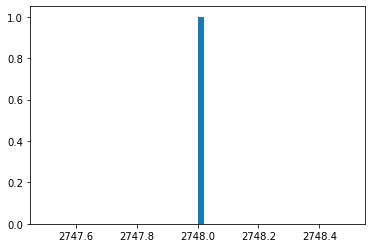

In [37]:
import matplotlib.pyplot as plt
plt.hist(len(f[0]),bins=50)